Actividad 5: Uso de software para búsqueda.

Grupo:006 Hora: jueves N4-N6

Hannia Soto Zurita 1948211

Edilson Alejandro Hernández López 2109291

José Eduardo Salazar Arellano 2109211

2.15.0
Shape de train_images: (60000, 28, 28)
Número de train_labels: 60000
Shape de test_images: (10000, 28, 28)
Número de test_labels: 10000


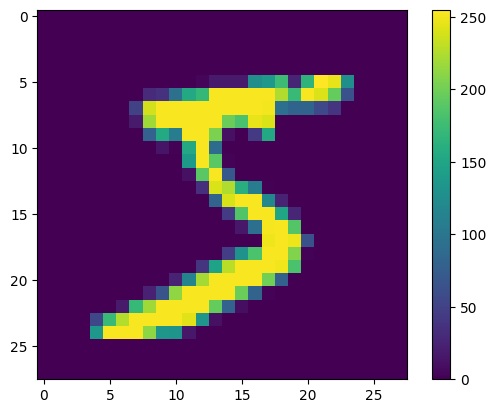

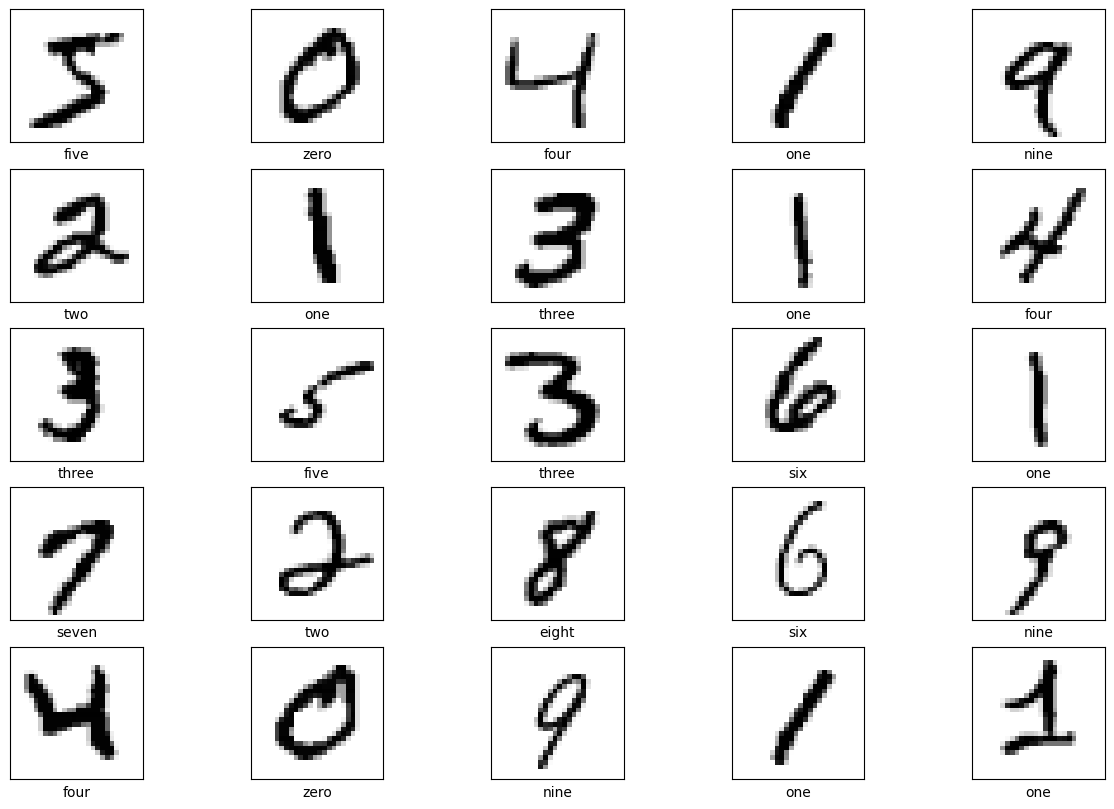

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2584 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1113 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0773 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0579 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0440 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0347 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0271 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0173 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.016

In [ ]:
#importar librerias
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

# Imprimir la versión de TensorFlow
print(tf.__version__)

# Cargo de datos
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Nombres de las clases
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

# Exploración de datos
print("Shape de train_images:", train_images.shape)
print("Número de train_labels:", len(train_labels))
print("Shape de test_images:", test_images.shape)
print("Número de test_labels:", len(test_labels))

# Preprocesar los datos
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualizar las primeras 25 imágenes del conjunto de entrenamiento
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construir el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # El input_shape debe ser (28, 28) para MNIST
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10)

#Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)







In [ ]:
#predicciones
predictions = model.predict(test_images)
predictions[0]

np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 1s 2ms/step


7

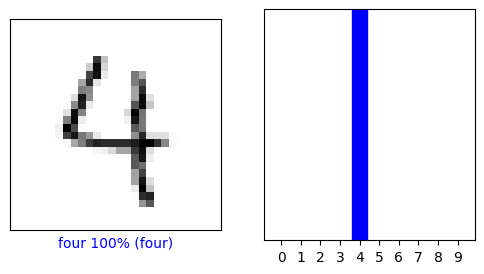

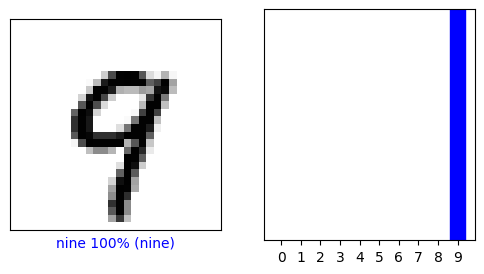

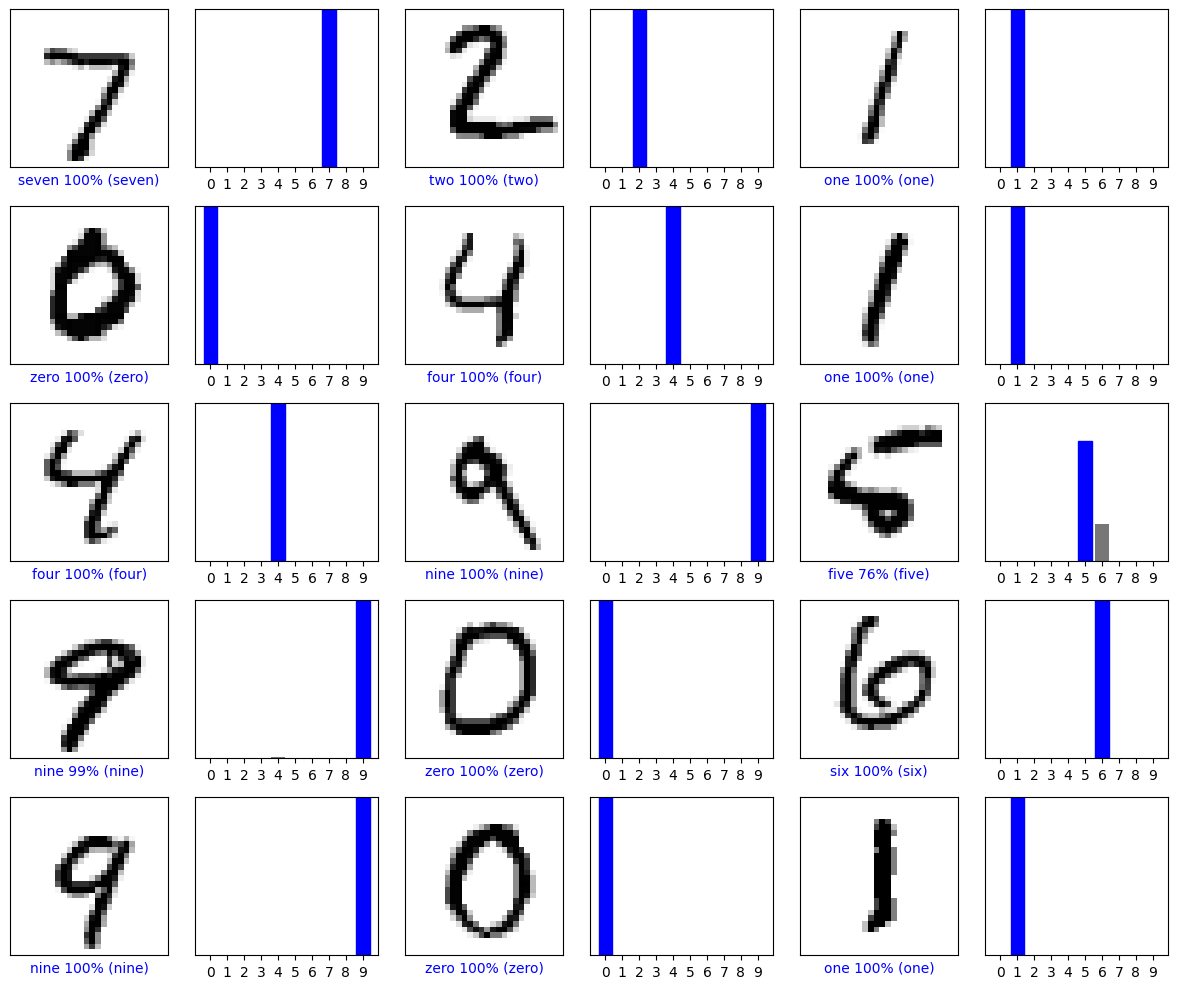

In [ ]:
#gráficas de predicción
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'green'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('green')
  thisplot[true_label].set_color('blue')

  i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Tabla de predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 32ms/step
[[2.4806776e-10 1.5209797e-07 9.9999988e-01 3.1351169e-10 4.6497182e-25
  5.0546300e-10 2.8758643e-10 7.1410792e-19 1.1704249e-09 3.1107820e-19]]


2

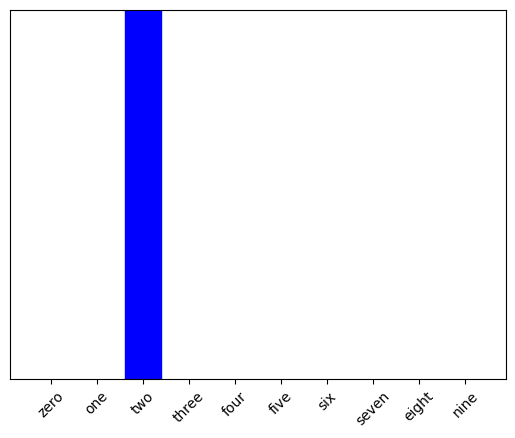

In [ ]:
#predicción única
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])